In [61]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [57]:
# load data
data = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0, 1))
X = data[:, 0]
y = data[:, 1]
m = y.size

In [52]:
# Plotter Function
def plot_data(x, y):
    plt.scatter(x, y, c='r', marker="x")
    plt.xlabel('population')
    plt.ylabel('profit')
    plt.show()

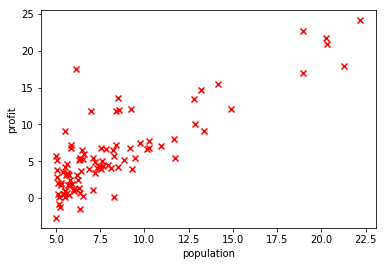

In [17]:
# Data Plotting
%matplotlib inline
plt.ion()
plt.figure(0)
plot_data(X, y)

In [53]:
# Compute Cost

def compute_cost(X, y, theta):
    # Initialize some useful values
    m = y.size
    cost = 0
    cost = np.sum((np.dot(X, theta) - y) ** 2) / (2 * m)

    return cost

In [54]:
# Gradient Descent

def gradient_descent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        error = np.dot(X, theta).flatten() - y
        theta -= (alpha/m)*np.sum(X*error[:, np.newaxis], 0)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

Initial cost : 32.072733877455676 
Theta found by gradient descent: [-3.63029144  1.16636235]


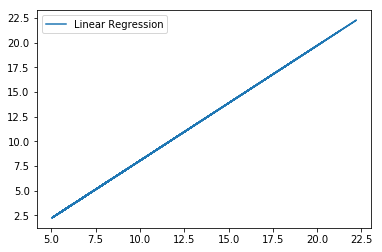

In [58]:
# Compute Gradient

X = np.c_[np.ones(m), X]  # Add a column of ones to X
theta = np.zeros(2)  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# Compute and display initial cost
print('Initial cost : ' + str(compute_cost(X, y, theta)) + ' ')

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent: ' + str(theta.reshape(2)))

# Plot the linear fit
plt.figure(0)
line1, = plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.legend(handles=[line1])

In [59]:
# Predict Values using the fit

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:0.3f} (This value should be about 4519.77)'.format(predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:0.3f} (This value should be about 45342.45)'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.768 (This value should be about 4519.77)
For population = 70,000, we predict a profit of 45342.450 (This value should be about 45342.45)


Visualizing J(theta0, theta1) ...


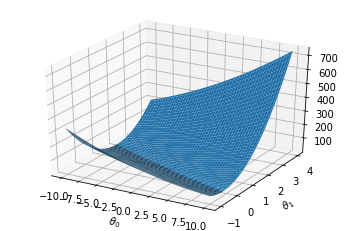

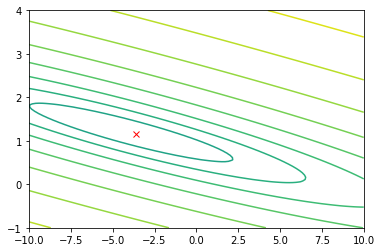

In [60]:
# Visualisation

print('Visualizing J(theta0, theta1) ...')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = compute_cost(X, y, t)

J_vals = np.transpose(J_vals)

fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")